In [64]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

plt.style.use('seaborn-whitegrid')

### Задача 1

Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):

salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110] <br>
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring.

- Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
- Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
- Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.
- Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
- Постройте для коэффициентов регрессии доверительные интервалы с помощью t-статистики Стьюдента.

### Решение

In [65]:
salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

In [66]:
x1 = np.array(salary)
y1 = np.array(scoring)

__Найдём коэффициенты линейной регрессии с помощью формул для парной регрессии:__

In [67]:
b1 = np.cov(x1, y1, ddof=0)[0, 1] / np.var(x1, ddof=0) 
#Замечание. В данной формуле не нужно обязательно использовать смещённую или несмещённую оценку, 
#но важно, конечно, использовать один и тот же тип оценки и для ковариации, и для дисперсии.
b1

2.6205388824027653

In [68]:
b0 = y1.mean() - b1 * x1.mean()
b0

444.17735732435955

Итак, уравнение регрессии имеет вид (коэффициенты округлены до сотых):
$$y = 444.18 + 2.62 \cdot x$$
т.е. с увеличением зарплаты на 1 условную единицу кредитный скоринг увеличивается на 2.62 ед

__Найдём коэффициенты линейной регрессии с помощью МНК:__

Для удобства записи введём дополнительный «фактор» x0 = 1. Поиск коэффициентов линейной регрессии сводится к решению системы линейных уравнений:
$$y = X \cdot b$$
где b — столбец коэффициентов регрессии, X — матрица объект-признак, y — столбец
целевой переменной.
Чаще всего такая система не имеет решений, поэтому задача состоит в минимизации расстояния между векторами $X \cdot b$ и $y$:
$$(X \cdot b - y)^\top \cdot (X \cdot b - y) \rightarrow \min_b.$$
Для такой задачи возможно записать аналитическое решение:
$$b = (X^\top X)^{-1} X^\top y.$$

In [69]:
x2 = x1.reshape(-1, 1)

y2 = y1.reshape(-1, 1)
y2

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

К матрице  𝑋  (массив x2) нужно также добавить столбец из  1 , соответствующий фиктивному фактору.

In [70]:
x2.shape

(10, 1)

In [71]:
ones = np.ones((x2.shape[0], 1))
x2 = np.hstack((ones, x2))

In [72]:
x2.shape

(10, 2)

In [73]:
x2

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

Запишем матрицу  𝑋⊤𝑋  и посчитаем её определитель.

In [74]:
XTX = x2.T.dot(x2)

np.linalg.det(XTX)

349464.00000000023

Определитель не близок к нулю, поэтому можно записать аналитическое решение:

In [75]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x2.T).dot(y2)

print(b)

[[444.17735732]
 [  2.62053888]]


Модель линейной регрессии 
$$y = b_0 + b_1 x_1 + \dots + b_k x_k$$
называется __несмещённой__, если математические ожидания правой и левой части равны:
$$M(y) = M(b_0 + b_1 x_1 + \dots + b_k x_k)$$
Как правило, несмещённые модели имеют лучшую _обобщающую способность_, чем смещённые, несмотря на то, что смещённые модели могут потенциально давать лучшие значения метрик качества (о них — чуть позже), чем несмещённые.

Проверим несмещённость уравнения регрессии из предыдущего примера:

In [76]:
x2.dot(b).mean(), y2.mean()

(709.8999999999999, 709.9)

__Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.__

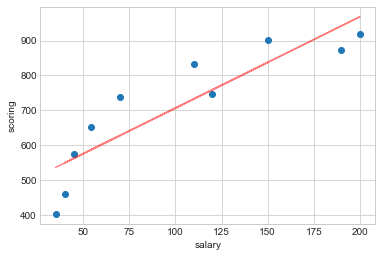

In [77]:
ox = x1
oy = b0 + b1 * ox

plt.scatter(x1, y1)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.xlabel('salary')
plt.ylabel('scoring');

__Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.__

__Коэффициент детерминации__:
$$R^2 = 1 - \dfrac{\sigma^2_{res}}{\sigma^2_{y}}$$

Для _несмещённых моделей регрессии_ коэффициент детерминации можно также посчитать как квадрат коэффициента корреляции между объясняемой переменной $y$ и предсказанной переменной $z$:
$$R^2 = r_{yz}^2.$$


In [78]:
z1 = b0 + b1 * x1

np.vstack([y1, z1]).T[:5]

array([[401.        , 535.89621821],
       [574.        , 562.10160703],
       [874.        , 942.07974498],
       [919.        , 968.2851338 ],
       [459.        , 548.99891262]])

In [79]:
#Коэффициент детерминации
R1 = 1 - (z1 - y1).var() / y1.var()
R1

0.7876386635293686

Коэффициент детерминации, равный  0.7876 , означает, что  79%  дисперсии переменной  𝑦  учитывается или объясняется моделью. Оставшиеся  21%  обусловлены какими-то ещё факторами, которые модель не учла.

Поскольку наша модель является несмещённой, то же значение можно посчитать как квадрат коэффициента корреляции между массивами x1 и y1:

In [80]:
np.corrcoef(x1, y1) ** 2

array([[1.        , 0.78763866],
       [0.78763866, 1.        ]])

__средняя ошибка аппроксимации__ вычисляется по формуле:
$$\overline{A} = \frac{1}{n} \displaystyle\sum_{i=1}^{n} \Bigl| {{\frac{y_i - z_i}{y_i}} \Bigr|}.$$

Если $\overline{A}$ не превышает $8$-$10 \%$, можно сказать, что теоретические значения близки к тем, которые выдает модель линейной регрессии.

In [81]:
def mean_approximation_error(y_real: np.ndarray, y_pred: np.ndarray) -> float:
    """Средняя ошибка аппроксимации.
    """
    
    return np.abs((y_real - y_pred) / y_real).mean()

In [82]:
mean_approximation_error(y1, z1)

0.11469251843561708

__Оцените построенное уравнение регрессии с помощью F-критерия Фишера.__

Оценить статистическую значимость уравнения линейной регрессии в целом можно с помощью __F-критерия Фишера__. Проверяется нулевая гипотеза о том, что все коэффициенты при факторах у регрессионной модели равны нулю (т.е. модель представляет из себя горизонтальную плоскость.)

Используемая здесь статистика:
$$F = \dfrac{R^2 / k}{(1 - R^2) / (n - k - 1)},$$
где $R^2$ — коэффициент детерминации, $n$ — число наблюдений, $k$ — число факторов. В литературе часто используются обозначения $k_1 = k$, $k_2 = n - k - 1$ (иногда вместо $k_1$, $k_2$ пишут также $f_1$, $f_2$).

Данную статистику можно понимать как отношение объяснённой дисперсии к необъяснённой.

Критическое значение $F_{сrit} = F(k_1, k_2)$ можно найти по таблице (например, по [такой](https://www.chem-astu.ru/science/reference/F-statistic.html)) или с помощью функции `scipy.stats.f.ppf`.

Если $F > F_{crit}$, то нулевая гипотеза отвергается и уравнение регрессии признаётся статистически значимым.

In [83]:
k1 = 1
k2 = x1.shape[0] - k1 - 1

F1 = (R1 / k1) / ((1 - R1) / k2)
F1

29.67164085966451

Для уровня значимости $\alpha = 0.05$ посчитаем по таблице значение $F_{crit} = F(1, 8)$. Оно равно $5.32$. То же самое с помощью `scipy`:

In [84]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

5.317655071578714

Имеем $F > F_{crit}$, поэтому уравнение регрессии статистически значимо.

__Постройте для коэффициентов регрессии доверительные интервалы с помощью t-статистики Стьюдента.__

В случае парной регрессии с помощью t-распределения Стьюдента можно построить доверительные интервалы для коэффициентов регрессии.

Например, построим доверительный интервал коэффициента наклона $b_1$ (из уравнения $y = b_0 + b_1 \cdot x$). Нам понадобится значение __стандартной ошибки коэффициента наклона__. Она вычисляется по формуле:
$$S_{slope} = \sqrt{\dfrac{\frac{1}{n - 2} \displaystyle\sum_{i=1}^{n}(y_i - z_i)^2}{\displaystyle\sum_{i=1}^n (x_i - \overline{x})^2}},$$
где:
* $x$, $x_i$ — соответственно, все значения и конкретное значение фактора
* $y_i$ — конкретное значение оцениваемой (целевой) переменной
* $z_i$ — «предсказанное» значение, полученное с помощью модели регрессии
* $n$ — число элементов в выборке

Допустим, мы получили коэффициент наклона $\hat{b}_1$ (например, с помощью формул для парной регрессии или с помощью метода наименьших квадратов). Пусть $b_1$ — реальное значение этого коэффициента. Тогда статистика
$$T = \dfrac{\hat{b}_1 - b_1}{S_{slope}}$$
имеет распределение Стьюдента с $n - 2$ степенями свободы. Для выбранного нами уровня доверия $p = 1 - \alpha$ доверительный интервал выглядит следующим образом:
$$P \left( \hat{b}_1 - t_{1 - \alpha/2, \: n - 2} \cdot S_{slope} \leq b_1 \leq \hat{b}_1 + t_{1 - \alpha/2, \: n - 2} \cdot S_{slope} \right) = p$$

Аналогично можно построить доверительный интервал для коэффициента сдвига $b_0$. __Стандартная ошибка коэффициента сдвига__ вычисляется по формуле:
$$S_{intercept} = S_{slope} \cdot \sqrt{\dfrac{1}{n} \displaystyle\sum_{i=1}^n x_i^2}.$$

In [85]:
def standard_error_slope(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента наклона.
    """
    
    n = x.shape[0]
    
    upper = ((y - z) ** 2).sum() / (n - 2)
    lower = ((x - x.mean()) ** 2).sum()
    
    return np.sqrt(upper / lower)

In [86]:
s_slope = standard_error_slope(x1, y1, z1)
s_slope

0.48108279568516005

Зададим уровень доверия  𝑝=0.95 , т.е.  𝛼=0.05 . В нашем случае  𝑛=10 , поэтому нас интересует квантиль  𝑡1−0.05/2,8=2.306 .

In [87]:
alpha = 0.05

t = stats.t.ppf(1 - alpha / 2, df=8)
t

2.3060041350333704

Доверительный интервал для параметра $b_1$:

In [88]:
(b1 - t * s_slope, b1 + t * s_slope)

(1.5111599662593722, 3.7299177985461585)

Аналогично для параметра $b_0$:

In [89]:
def standard_error_intercept(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента сдвига.
    """
    
    return standard_error_slope(x, y, z) * np.sqrt((x ** 2).mean())

In [90]:
s_intercept = standard_error_intercept(x1, y1, z1)
s_intercept

56.46649755068153

Доверительный интервал для параметра $b_0$:

In [91]:
(b0 - t * s_intercept, b0 + t * s_intercept) #b0 лежит в интервале

(313.96538048163626, 574.3893341670828)

### Задача

Квартет Энскомба — популярный в области анализа данных пример наборов данных, у которых практически совпадают все статистические свойства (средние, дисперсии, коэффициенты корреляции, регрессионные линии), однако, существенно отличаются графики. Данный пример призван показать, насколько важна визуализация данных. Датасет представляет собой 4 пары выборок:

{
    - "x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    - "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    - "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    - "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
    - "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    - "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    - "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
    - "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]
}
По каждой паре выборок посчитайте:

выборочное среднее и дисперсию каждой выборки,
коэффициент корреляции Пирсона и прямую линейной регрессии.
Убедившись в том, что они практически не отличаются, постройте scatter plot по каждой паре выборок.
### Решение

In [92]:
x1 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
x2 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74])
x3 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89])

In [93]:

print(f"среднее X:{x1.mean()}, среднее Y:{y1.mean()}, дисперсия X:{x1.var()}, дисперсия Y:{y1.var()}")
print(f"среднее X:{x2.mean()}, среднее Y:{y2.mean()}, дисперсия X:{x2.var()}, дисперсия Y:{y2.var()}")
print(f"среднее X:{x3.mean()}, среднее Y:{y3.mean()}, дисперсия X:{x3.var()}, дисперсия Y:{y3.var()}")
print(f"среднее X:{x4.mean()}, среднее Y:{y4.mean()}, дисперсия X:{x4.var()}, дисперсия Y:{y4.var()}")
print(f"Коэф-т корреляции:{np.corrcoef(x1, y1)[0,1]}")
print(f"Коэф-т корреляции:{np.corrcoef(x2, y2)[0,1]}")
print(f"Коэф-т корреляции:{np.corrcoef(x3, y3)[0,1]}")
print(f"Коэф-т корреляции:{np.corrcoef(x4, y4)[0,1]}")

среднее X:9.0, среднее Y:7.500909090909093, дисперсия X:10.0, дисперсия Y:3.7520628099173554
среднее X:9.0, среднее Y:7.50090909090909, дисперсия X:10.0, дисперсия Y:3.752390082644628
среднее X:9.0, среднее Y:7.5, дисперсия X:10.0, дисперсия Y:3.747836363636364
среднее X:9.0, среднее Y:7.500909090909091, дисперсия X:10.0, дисперсия Y:3.7484082644628103
Коэф-т корреляции:0.81642051634484
Коэф-т корреляции:0.8162365060002428
Коэф-т корреляции:0.8162867394895984
Коэф-т корреляции:0.8165214368885028


In [94]:
#найдем коэф-ты линейной регрессии
b1_1 = np.cov(x1, y1, ddof=0)[0, 1] / np.var(x1, ddof=0)
b0_1 = y1.mean() - b1_1 * x1.mean()

b1_2 = np.cov(x2, y2, ddof=0)[0, 1] / np.var(x2, ddof=0)
b0_2 = y2.mean() - b1_2 * x2.mean()

b1_3 = np.cov(x3, y3, ddof=0)[0, 1] / np.var(x3, ddof=0)
b0_3 = y3.mean() - b1_3 * x3.mean()

b1_4 = np.cov(x4, y4, ddof=0)[0, 1] / np.var(x4, ddof=0)
b0_4 = y4.mean() - b1_4 * x4.mean()


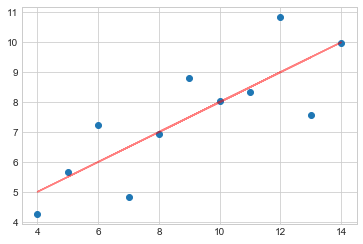

In [96]:
ox1 = x1
oy1 = b0_1 + b1_1 * ox1

plt.scatter(x1, y1)
plt.plot(ox1, oy1, color='red', alpha=0.5)

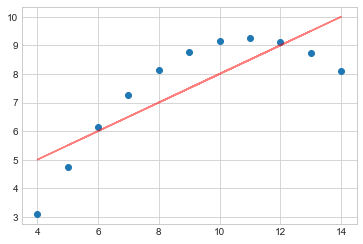

In [97]:
ox2 = x2
oy2 = b0_2 + b1_2 * ox2

plt.scatter(x2, y2)
plt.plot(ox2, oy2, color='red', alpha=0.5)

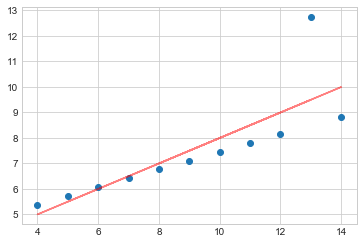

In [98]:
ox3 = x3
oy3 = b0_3 + b1_3 * ox3

plt.scatter(x3, y3)
plt.plot(ox3, oy3, color='red', alpha=0.5)

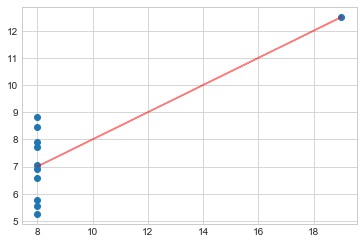

In [99]:
ox4 = x4
oy4 = b0_4 + b1_4 * ox4

plt.scatter(x4, y4)
plt.plot(ox4, oy4, color='red', alpha=0.5)

Text(0.5, 1.0, '4 пара')

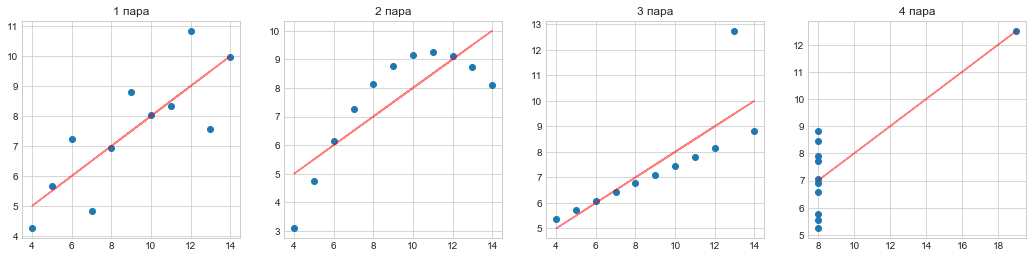

In [100]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4)
fig.set_size_inches(18, 4)
ax1.scatter(x1, y1)
ax1.plot(ox1, oy1, color='red', alpha=0.5)
ax1.set_title("1 пара")

ax2.scatter(x2, y2)
ax2.plot(ox2, oy2, color='red', alpha=0.5)
ax2.set_title("2 пара")

ax3.scatter(x3, y3)
ax3.plot(ox3, oy3, color='red', alpha=0.5)
ax3.set_title("3 пара")

ax4.scatter(x4, y4)
ax4.plot(ox4, oy4, color='red', alpha=0.5)
ax4.set_title("4 пара")

